In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Kelly Criterion

## Formula

A formula for sizing a sequence of bets by maximizing long-term EV.

$$f^* = \frac{p}{l} - \frac{q}{g}$$
where:
- $f^*$ is the fraction of assets to apply to the bet
- $p$ is the win probability
- $q$ is the lose probability ($1 - p$)
- $g$ is the fraction that is gained in a positive outcome
- $l$ is the fraction that is lost in a negative outcome

## Limitations
The Kelly criterion is only perfectly valid when all outcome posibilities are fully known (i.e., all specific outcome probabilities and their corresponding effects are known).

## Understanding edge
The general form of the Kelly criterion can be written as:
$$f^* = \frac{p}{l} \left(1 - \frac{1}{WLP} \frac{1}{WLR} \right)$$
where:
- $WLP$ is the win-loss probability ratio given by $\frac{p}{1-p}$
- $WLR$ is the win-loss ratio of bet outcomes (aka winning skew) given by $\frac{g}{l}$

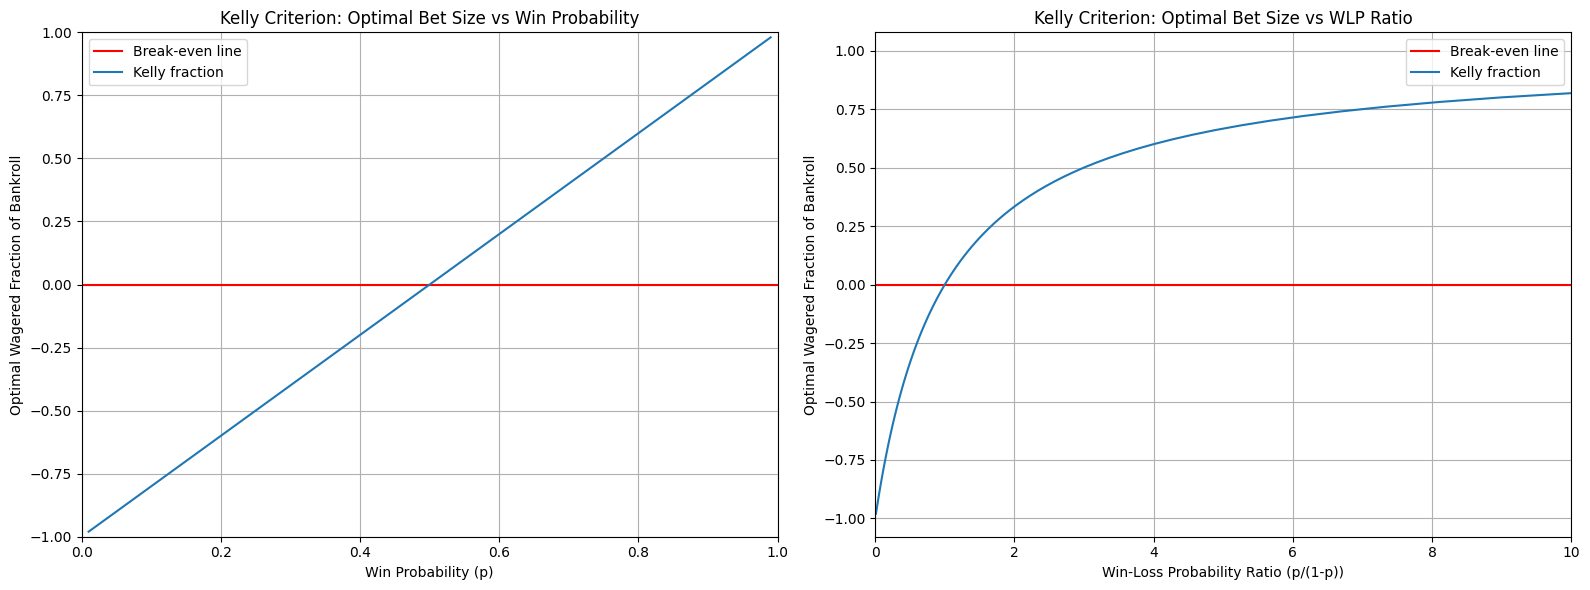

In [54]:
# Simulation given changing WLP

generated_data = pd.DataFrame(columns=['p', 'WLP', 'WLR', 'f*'])

for p in np.arange(0.01, 1, 0.01):  # Start from 0.01 instead of 0 to avoid division by zero
    q = 1 - p
    g = 1 # gain per win
    l = 1 # loss per loss

    WLP = p/q
    WLR = g/l

    f_star = (p/l) * (1 - (1/WLP) * (1/WLR))

    new_data = pd.DataFrame({
        'p': [p],
        'WLP': [WLP],
        'WLR': [WLR],
        'f*': [f_star]
    })

    generated_data = pd.concat([generated_data, new_data], ignore_index=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: f* vs Win Probability (p)
ax1.set_xlabel('Win Probability (p)')
ax1.set_ylabel('Optimal Wagered Fraction of Bankroll')
ax1.set_title('Kelly Criterion: Optimal Bet Size vs Win Probability')
ax1.grid(True)
ax1.axhline(y=0, color="red", linestyle="-", label='Break-even line')
ax1.plot(generated_data['p'], generated_data['f*'], label='Kelly fraction')
ax1.set_xlim(0, 1)
ax1.set_ylim(-1, 1)
ax1.legend()

# Plot 2: f* vs Win-Loss Probability Ratio (WLP)
ax2.set_xlabel('Win-Loss Probability Ratio (p/(1-p))')
ax2.set_ylabel('Optimal Wagered Fraction of Bankroll')
ax2.set_title('Kelly Criterion: Optimal Bet Size vs WLP Ratio')
ax2.grid(True)
ax2.axhline(y=0, color="red", linestyle="-", label='Break-even line')
ax2.plot(generated_data['WLP'], generated_data['f*'], label='Kelly fraction')
ax2.set_xlim(0, 10)
ax2.legend()

plt.tight_layout()
plt.show()